In [8]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def contours_to_polygons(contours):
#     """
#     Convert contours to polygons.
#     """
#     polygons = []
#     for contour in contours:
#         polygon = []
#         for point in contour:
#             polygon.append(tuple(point[0]))
#         polygons.append(polygon)
#     return polygons

# def poly_to_mask(polygons, width, height):
#     """
#     Convert polygons to mask.
#     """
#     mask = np.zeros((height, width), dtype=np.uint8)
#     for polygon in polygons:
#         pts = np.array(polygon, np.int32)
#         pts = pts.reshape((-1, 1, 2))
#         cv2.fillPoly(mask, [pts], 255)
#     return mask

# def compute_iou(mask1, mask2):
#     """
#     Compute Intersection over Union (IoU) between two masks.
#     """
#     intersection = np.logical_and(mask1, mask2)
#     union = np.logical_or(mask1, mask2)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score

# # Read the predicted and label images in color and convert them to grayscale
# prediction_img_color = cv2.imread("Predicted mask for Field28(epoch50).png")
# label_img_color = cv2.imread("Field28.png")

# prediction_img = cv2.cvtColor(prediction_img_color, cv2.COLOR_BGR2GRAY)
# label_img = cv2.cvtColor(label_img_color, cv2.COLOR_BGR2GRAY)

# # Invert the colors of the predicted image
# #!!! Important, use it when the predict picture input is not black background!!!
# prediction_img = cv2.bitwise_not(prediction_img)

# # Find contours in the predicted and label images
# prediction_contours = cv2.findContours(prediction_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
# label_contours = cv2.findContours(label_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

# # Convert contours to polygons
# prediction_polygons = contours_to_polygons(prediction_contours)
# label_polygons = contours_to_polygons(label_contours)

# # Convert polygons to masks
# prediction_mask = poly_to_mask(prediction_polygons, prediction_img.shape[1], prediction_img.shape[0])
# label_mask = poly_to_mask(label_polygons, label_img.shape[1], label_img.shape[0])

# # Compute IoU for each polygon and calculate the mean IoU
# polygon_ious = []
# for prediction_polygon in prediction_polygons:
#     max_iou = 0
#     for label_polygon in label_polygons:
#         intersection = poly_to_mask([prediction_polygon], prediction_img.shape[1], prediction_img.shape[0]) & \
#                        poly_to_mask([label_polygon], label_img.shape[1], label_img.shape[0])
#         union = poly_to_mask([prediction_polygon], prediction_img.shape[1], prediction_img.shape[0]) | \
#                 poly_to_mask([label_polygon], label_img.shape[1], label_img.shape[0])
#         iou = np.sum(intersection) / np.sum(union)
#         max_iou = max(max_iou, iou)
#     polygon_ious.append(max_iou)

# mean_iou = np.mean(polygon_ious)

# print("Mean IoU for each polygon:", polygon_ious)
# print("Mean IoU for the entire image:", mean_iou)

# # Display the images
# plt.imshow(prediction_img, cmap='gray')
# plt.title('Predicted Image')
# plt.show()

# plt.imshow(label_img, cmap='gray')
# plt.title('Label Image')
# plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contours_to_polygons(contours):
    """
    Convert contours to polygons.
    """
    polygons = []
    for contour in contours:
        polygon = []
        for point in contour:
            polygon.append(tuple(point[0]))
        polygons.append(polygon)
    return polygons

def poly_to_mask(polygons, width, height):
    """
    Convert polygons to mask.
    """
    mask = np.zeros((height, width), dtype=np.uint8)
    for polygon in polygons:
        pts = np.array(polygon, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.fillPoly(mask, [pts], 255)
    return mask

def compute_iou(mask1, mask2):
    """
    Compute Intersection over Union (IoU) between two masks.
    """
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_iou(predicted_img_path, label_img_path, invert_predicted=False):
    """
    Calculate IoU for the entire image and each polygon in the predicted and label images.
    
    Args:
    - predicted_img_path (str): Path to the predicted image file.
    - label_img_path (str): Path to the label image file.
    - invert_predicted (bool, optional): Whether to invert the colors of the predicted image. Default is False.
    
    Returns:
    - mean_iou (float): Mean IoU for the entire image.
    - polygon_ious (list): IoU values for each polygon.
    """
    # Read the predicted and label images in color and convert them to grayscale
    prediction_img_color = cv2.imread(predicted_img_path)
    label_img_color = cv2.imread(label_img_path)

    prediction_img = cv2.cvtColor(prediction_img_color, cv2.COLOR_BGR2GRAY)
    label_img = cv2.cvtColor(label_img_color, cv2.COLOR_BGR2GRAY)

    # Invert the colors of the predicted image if specified
    if invert_predicted:
        prediction_img = cv2.bitwise_not(prediction_img)

    # Find contours in the predicted and label images
    prediction_contours = cv2.findContours(prediction_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
    label_contours = cv2.findContours(label_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

    # Convert contours to polygons
    prediction_polygons = contours_to_polygons(prediction_contours)
    label_polygons = contours_to_polygons(label_contours)

    # Convert polygons to masks
    prediction_mask = poly_to_mask(prediction_polygons, prediction_img.shape[1], prediction_img.shape[0])
    label_mask = poly_to_mask(label_polygons, label_img.shape[1], label_img.shape[0])

    # Compute IoU for each polygon and calculate the mean IoU
    polygon_ious = []
    for prediction_polygon in prediction_polygons:
        max_iou = 0
        for label_polygon in label_polygons:
            intersection = poly_to_mask([prediction_polygon], prediction_img.shape[1], prediction_img.shape[0]) & \
                           poly_to_mask([label_polygon], label_img.shape[1], label_img.shape[0])
            union = poly_to_mask([prediction_polygon], prediction_img.shape[1], prediction_img.shape[0]) | \
                    poly_to_mask([label_polygon], label_img.shape[1], label_img.shape[0])
            iou = np.sum(intersection) / np.sum(union)
            max_iou = max(max_iou, iou)
        polygon_ious.append(max_iou)

    mean_iou = np.mean(polygon_ious)

    print("Mean IoU for each polygon:", polygon_ious)
    print("Mean IoU for the entire image:", mean_iou)

    # Display the images
    plt.imshow(prediction_img, cmap='gray')
    plt.title('Predicted Image')
    plt.show()

    plt.imshow(label_img, cmap='gray')
    plt.title('Label Image')
    plt.show()

    return mean_iou, polygon_ious

# Example usage:
# mean_iou, polygon_ious = calculate_iou("Predicted mask.png", "Label.png", invert_predicted=True)
# !!! Important, set invert_predicted=True when the predict picture input is not black background !!!

Mean IoU for each polygon: [0, 0, 0.9793613707165109, 0.960552575776475, 0.9730118914901523, 0.9533390966068727, 0.9455730389854392, 0.9650756302521009, 0, 0, 0, 0, 0]
Mean IoU for the entire image: 0.44437796952519626


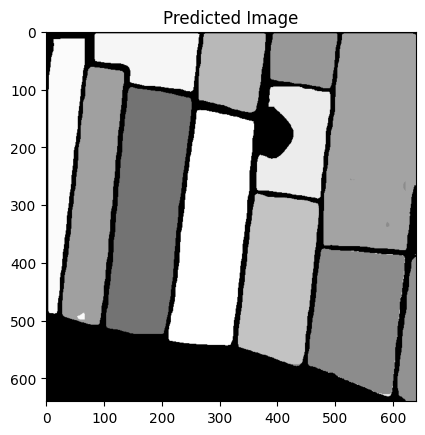

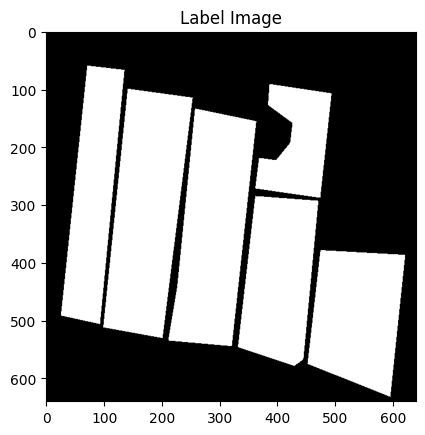

In [10]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.15.png", "Field28.png", invert_predicted=True)

Mean IoU for each polygon: [0.9754280564734155, 0.9694477829084699, 0.9730118914901523, 0.9533390966068727, 0.9455730389854392, 0.9650756302521009, 0, 0, 0, 0]
Mean IoU for the entire image: 0.5781875496716451


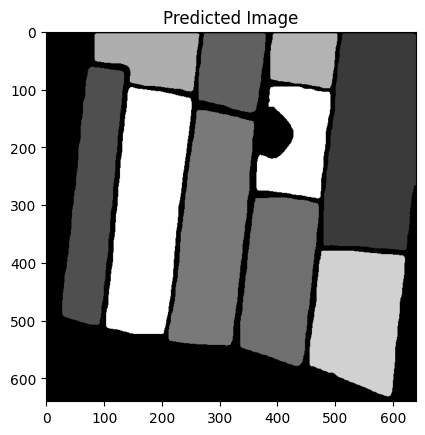

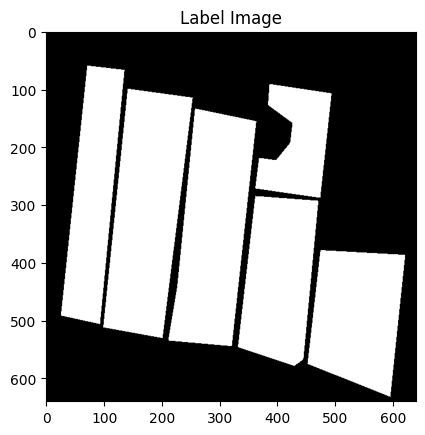

In [11]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.35.png", "Field28.png", invert_predicted=True)

Mean IoU for each polygon: [0.9754280564734155, 0.9694477829084699, 0.9730118914901523, 0.9533390966068727, 0.9455730389854392, 0.9650756302521009, 0, 0, 0]
Mean IoU for the entire image: 0.6424306107462723


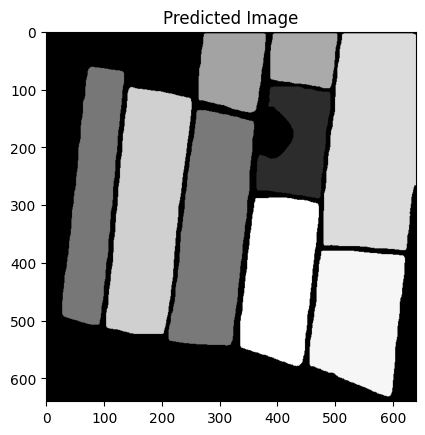

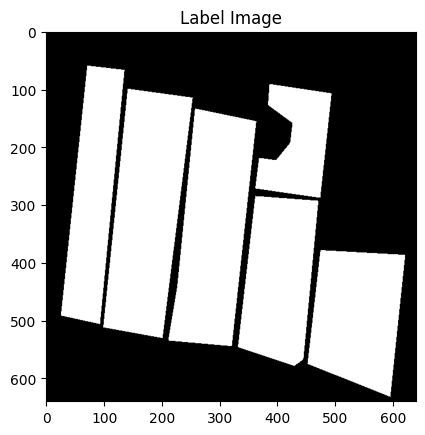

In [12]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.55.png", "Field28.png", invert_predicted=True)

Mean IoU for each polygon: [0.9754280564734155, 0.9730118914901523, 0.9533390966068727, 0.9455730389854392, 0, 0]
Mean IoU for the entire image: 0.6412253472593132


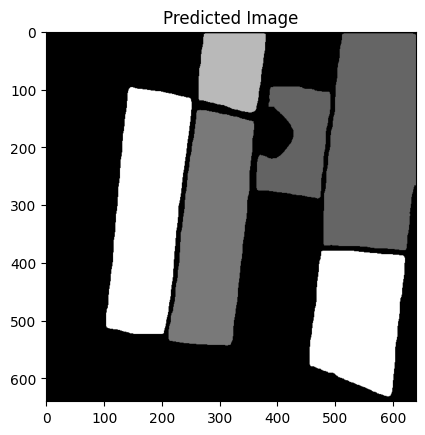

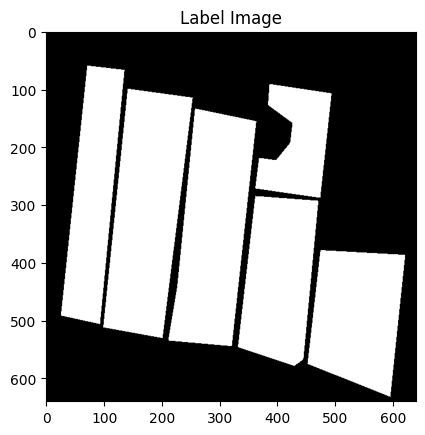

In [13]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.75.png", "Field28.png", invert_predicted=True)

Mean IoU for each polygon: [0.9730118914901523, 0.9533390966068727, 0]
Mean IoU for the entire image: 0.6421169960323416


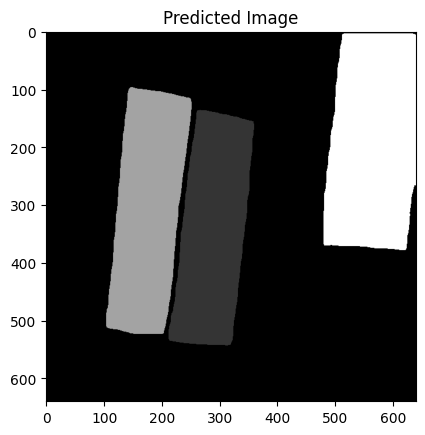

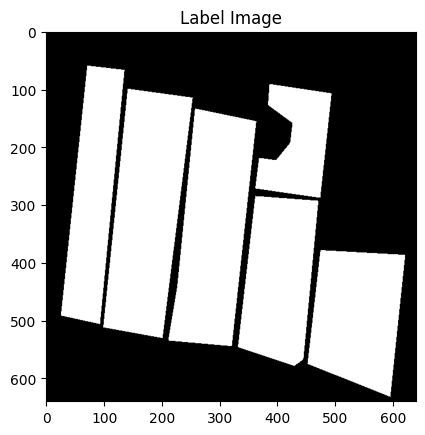

In [14]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.8.png", "Field28.png", invert_predicted=True)

Mean IoU for each polygon: [0.9730118914901523]
Mean IoU for the entire image: 0.9730118914901523


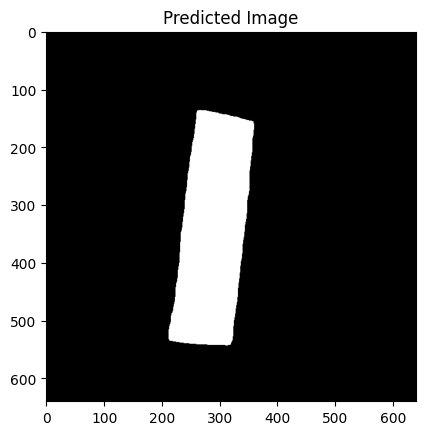

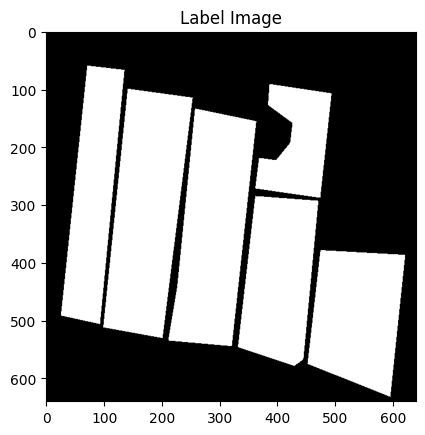

In [15]:
mean_iou, polygon_ious = calculate_iou("Predicted-Field28-conf0.85.png", "Field28.png", invert_predicted=True)